# Shared Bikes Demand Prediction using Multiple Linear Regression

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands





The Solution has been divided into the following main sections:

- Data Understanding and EDA
- Data Visualization
- Data Preparation
- Model Building
- Evaluation and Prediction

In [1]:
#import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Understanding and EDA

In [2]:
# load the bike sharing data
b_data = pd.read_csv('day.csv')

In [3]:
b_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking shape 
b_data.shape

(730, 16)

In [5]:
#checing datatypes and null count of rows
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# we will explore each column and try to undestand them using data dictionary 

Columns 'instant' and 'dteday' have no use for our analysis so we can safely drop these columns 

In [7]:
b_data.drop(['instant','dteday'],axis = 1,inplace = True)

In [8]:
b_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### From data dictionary we found 
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


We will convert **season, month, weekday and weathersit** columns to object type categorical column
<br>
so as to prevent model from  interpreting these numbers as having a natural ordering and equidistant relationships, which may not be true.
<br>
We will keep holiday, yr and working day as it is already in 0, 1 format which has a meaning of True or False 

In [9]:
# season
#creating function to map string values to each season numbers 

def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

b_data[['season']] = b_data[['season']].apply(season_map)

In [10]:
b_data.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [11]:
b_data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [12]:
#yr (year)
b_data.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [13]:
# Mnth
#creating function to map string values to each month numbers 

def mnth_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

b_data[['mnth']] = b_data[['mnth']].apply(mnth_map)

In [14]:
b_data.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [15]:
b_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
#holiday column
b_data.holiday.value_counts()


holiday
0    709
1     21
Name: count, dtype: int64

In [17]:
# weekday column
#creating function to map string values to each weekday 

def weekday_map(x):
    return x.map({0: 'SUN', 1:'MON', 2:'TUE', 3:'WED', 4:'THU',5:'FRI', 6:'SAT' })

b_data[['weekday']] = b_data[['weekday']].apply(weekday_map)

In [18]:
b_data.weekday.value_counts()

weekday
MON    105
TUE    105
WED    104
THU    104
FRI    104
SAT    104
SUN    104
Name: count, dtype: int64

In [19]:
b_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,MON,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,TUE,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,WED,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,THU,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,FRI,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
#working day column
b_data.workingday.value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [21]:
#weathersit column

#1: Clear, Few clouds, Partly cloudy, Partly cloudy  --> A 
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist--->B
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds --> C
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog --> D


def weather_map(x):
    return x.map({ 1:'A', 2:'B', 3:'C', 4:'D'})

b_data[['weathersit']] = b_data[['weathersit']].apply(weather_map)



In [22]:
b_data.weathersit.value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

In [23]:
b_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,MON,1,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,TUE,1,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,WED,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,THU,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,FRI,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [24]:
# let us make column subset for numerical and categorical columns
# this will make our data visualisation easier


In [25]:
# numerical columns
num_cols= ['temp','atemp','hum','windspeed','casual','registered','cnt']

#categorical columns
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [26]:
b_data[num_cols].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Visualization 

Visualising numerical columns

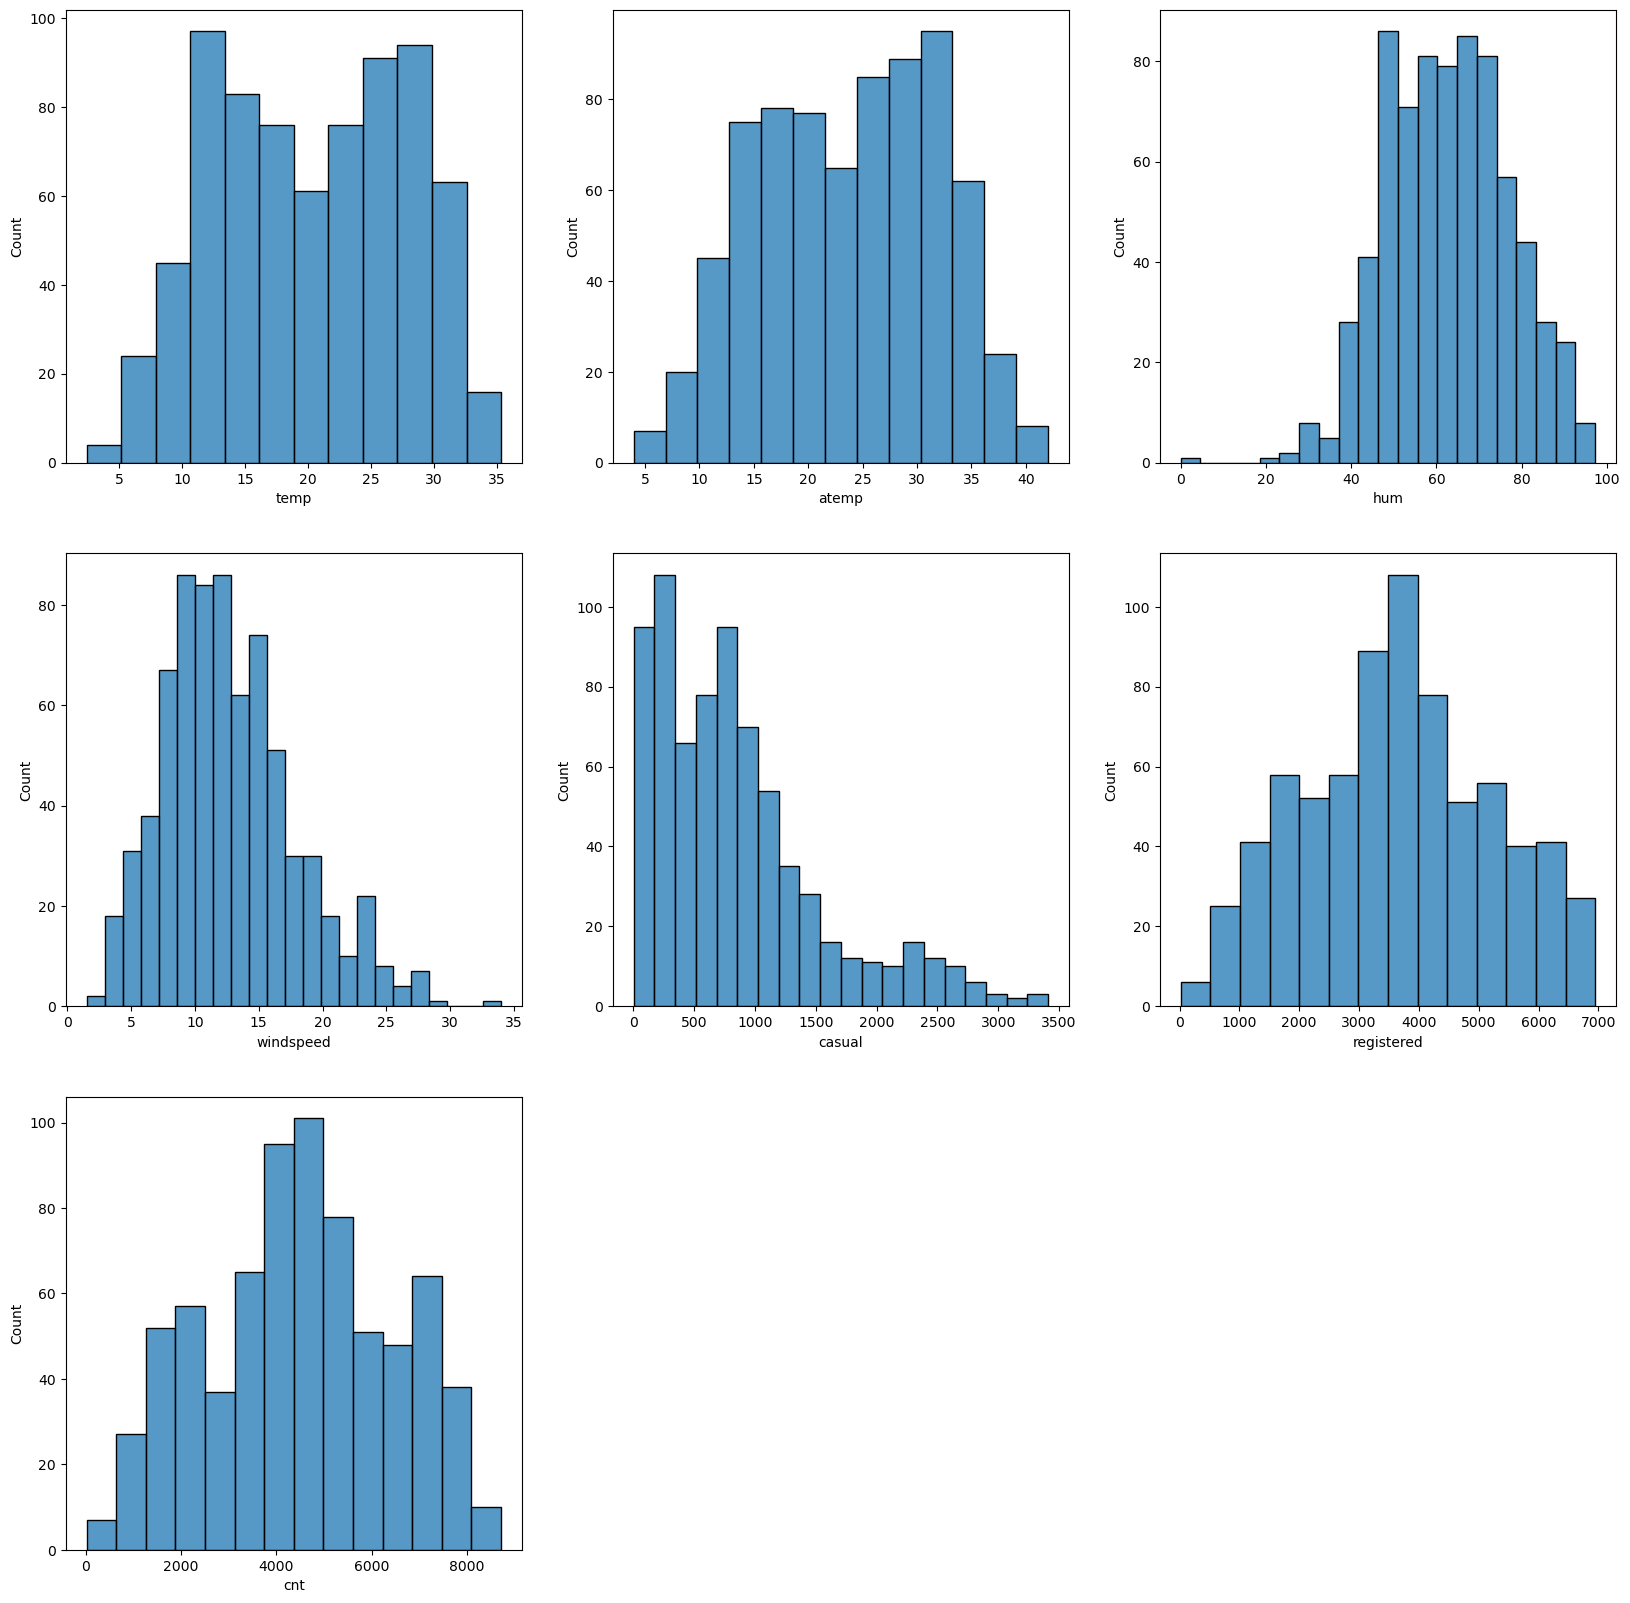

In [27]:
# Visualizing distribution of each numerical column
plt.figure(figsize=(20, 20))  
for index,value in enumerate(num_cols): #using enumerate to use both index and value from num_cols in subplot
    plt.subplot(3,3,(index+1))
    sns.histplot(b_data[value])
plt.show()

In [28]:
# Visualise correlation using pair plots

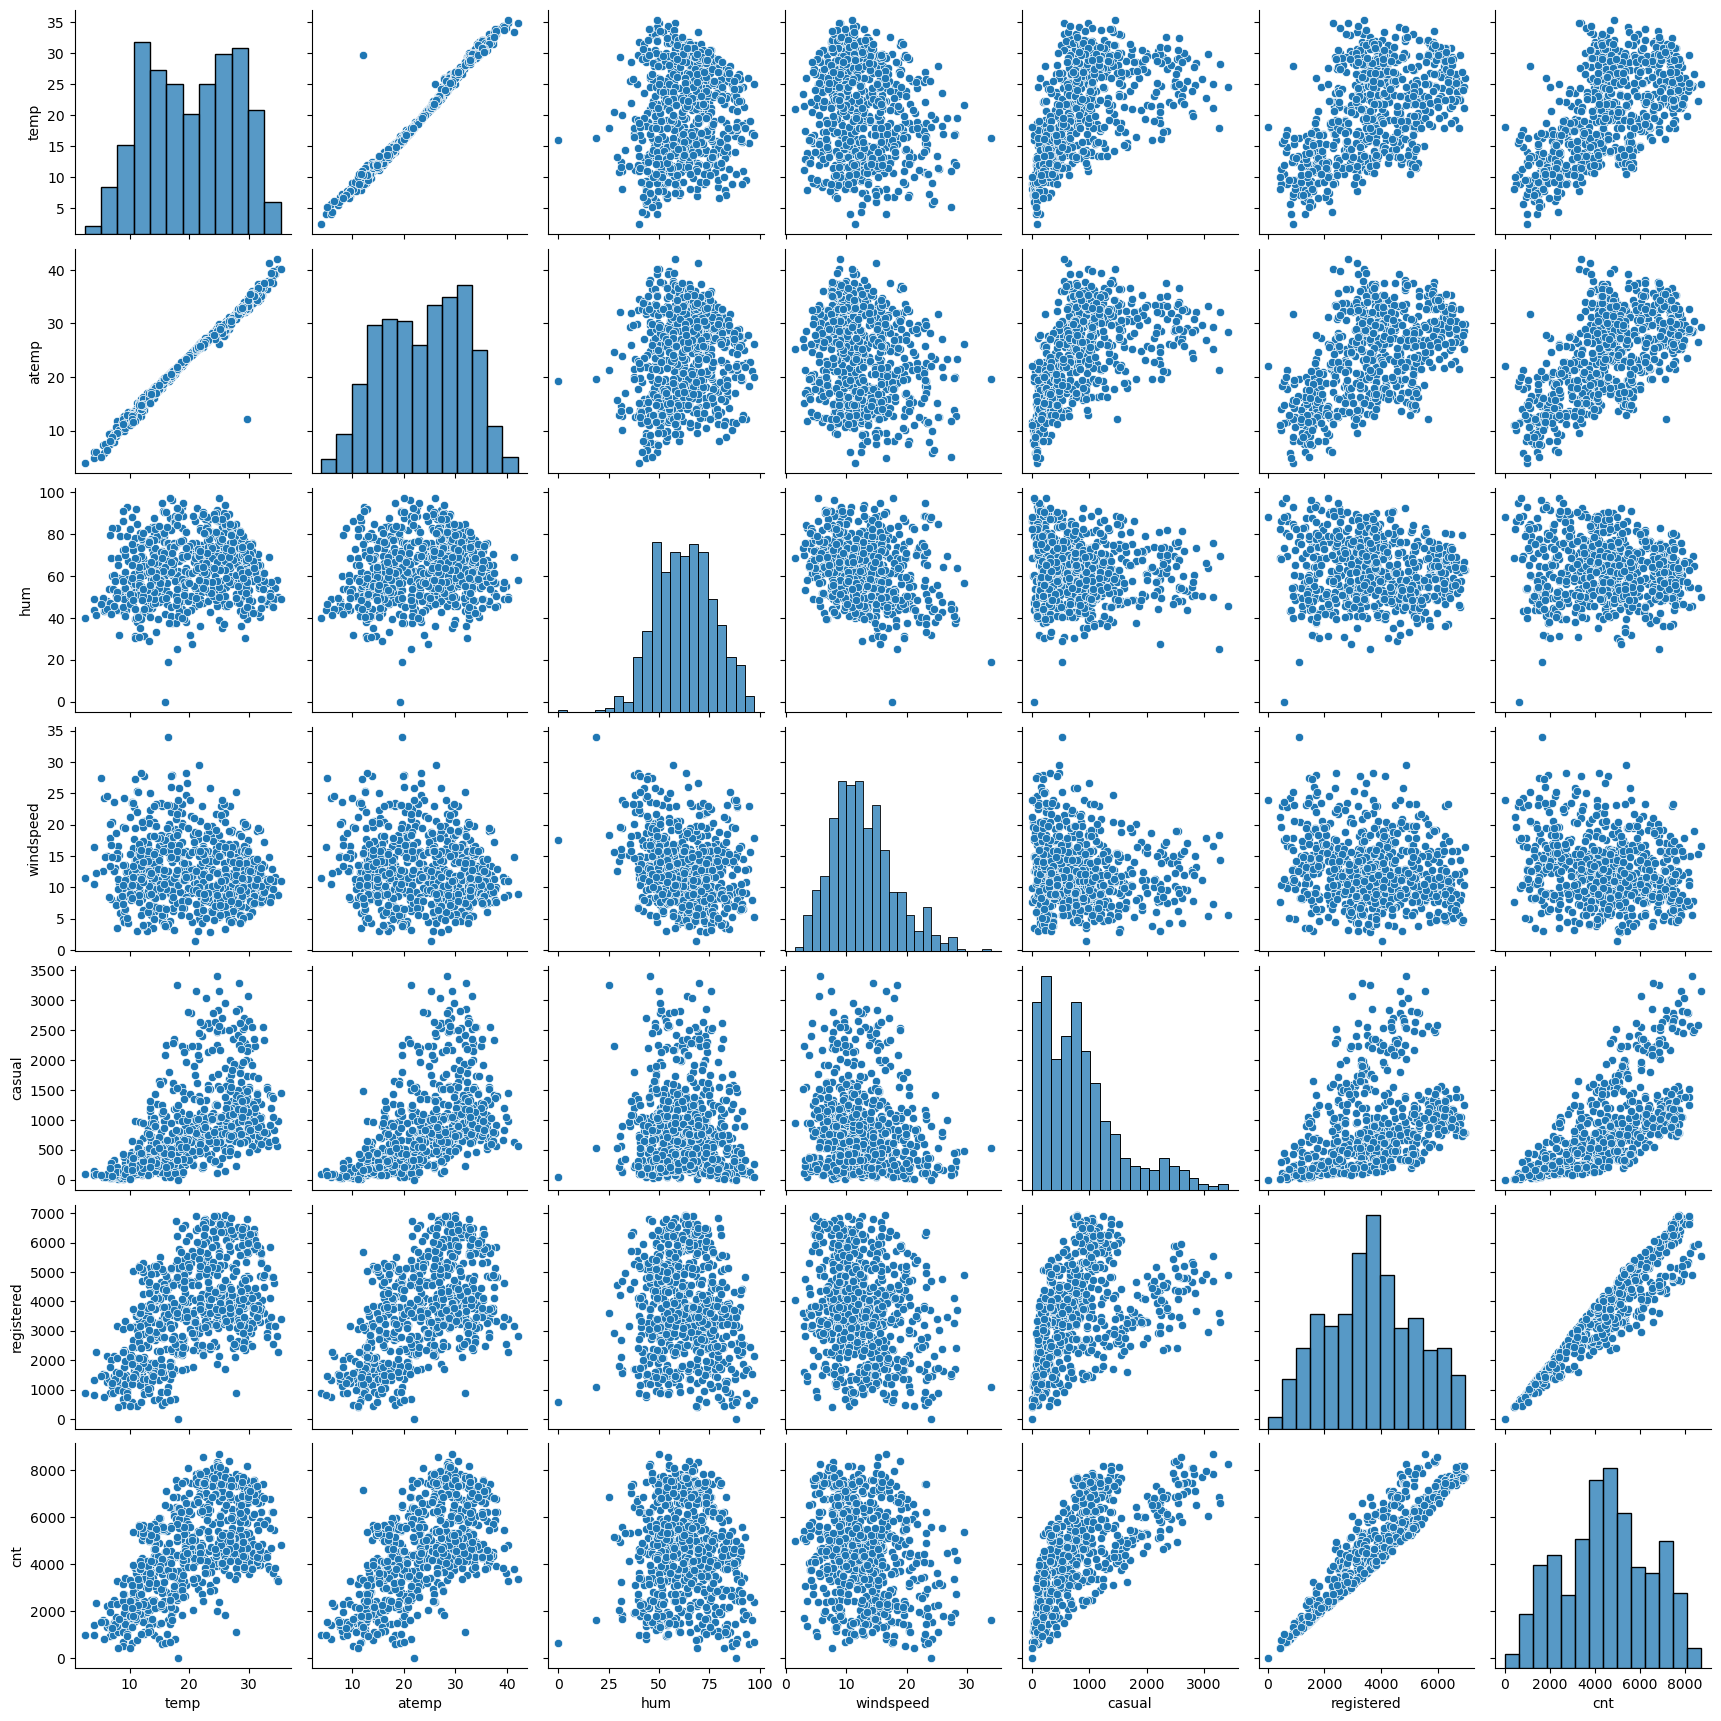

In [29]:
sns.pairplot(b_data[num_cols])
plt.show()

In [30]:
# now lets visualize correlation of numerical columns using heatmap

In [31]:
#correlaton matrix
cor =  b_data[num_cols].corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


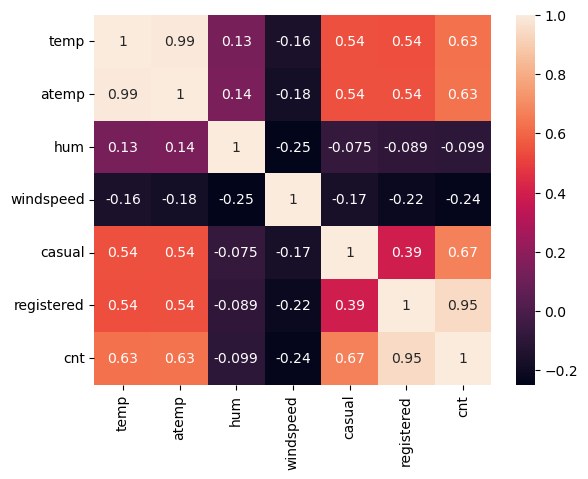

In [32]:
#heatmap
sns.heatmap(cor,annot=True)
plt.show()

#### Insights from Visualization of Numerical Columns:
- We can see cnt is negatively correlated with windspeed which means demand will be less on a windy day
- Cnt is highly correlated with casual and registered columns. Now this is because these 2 columns togethere represent cnt.
- We can also observe that there is strong correlation among independent variables temp and atemp


In [33]:
# let us drop atemp(feels like temperature) column since it is highly correlated with temp 
b_data.drop('atemp',axis =1 , inplace = True)

In [34]:
# let us also drop 'atemp' from num_cols
num_cols.remove('atemp') 

In [35]:
# let us also drop 'casual' and 'drop' since we are interested in cnt and both these columns together represent 'cnt'

In [36]:
b_data.drop(['casual','registered'],axis =1 , inplace = True)

In [37]:
num_cols.remove('casual')

In [38]:
num_cols.remove('registered')

#### Visualising categorical columns

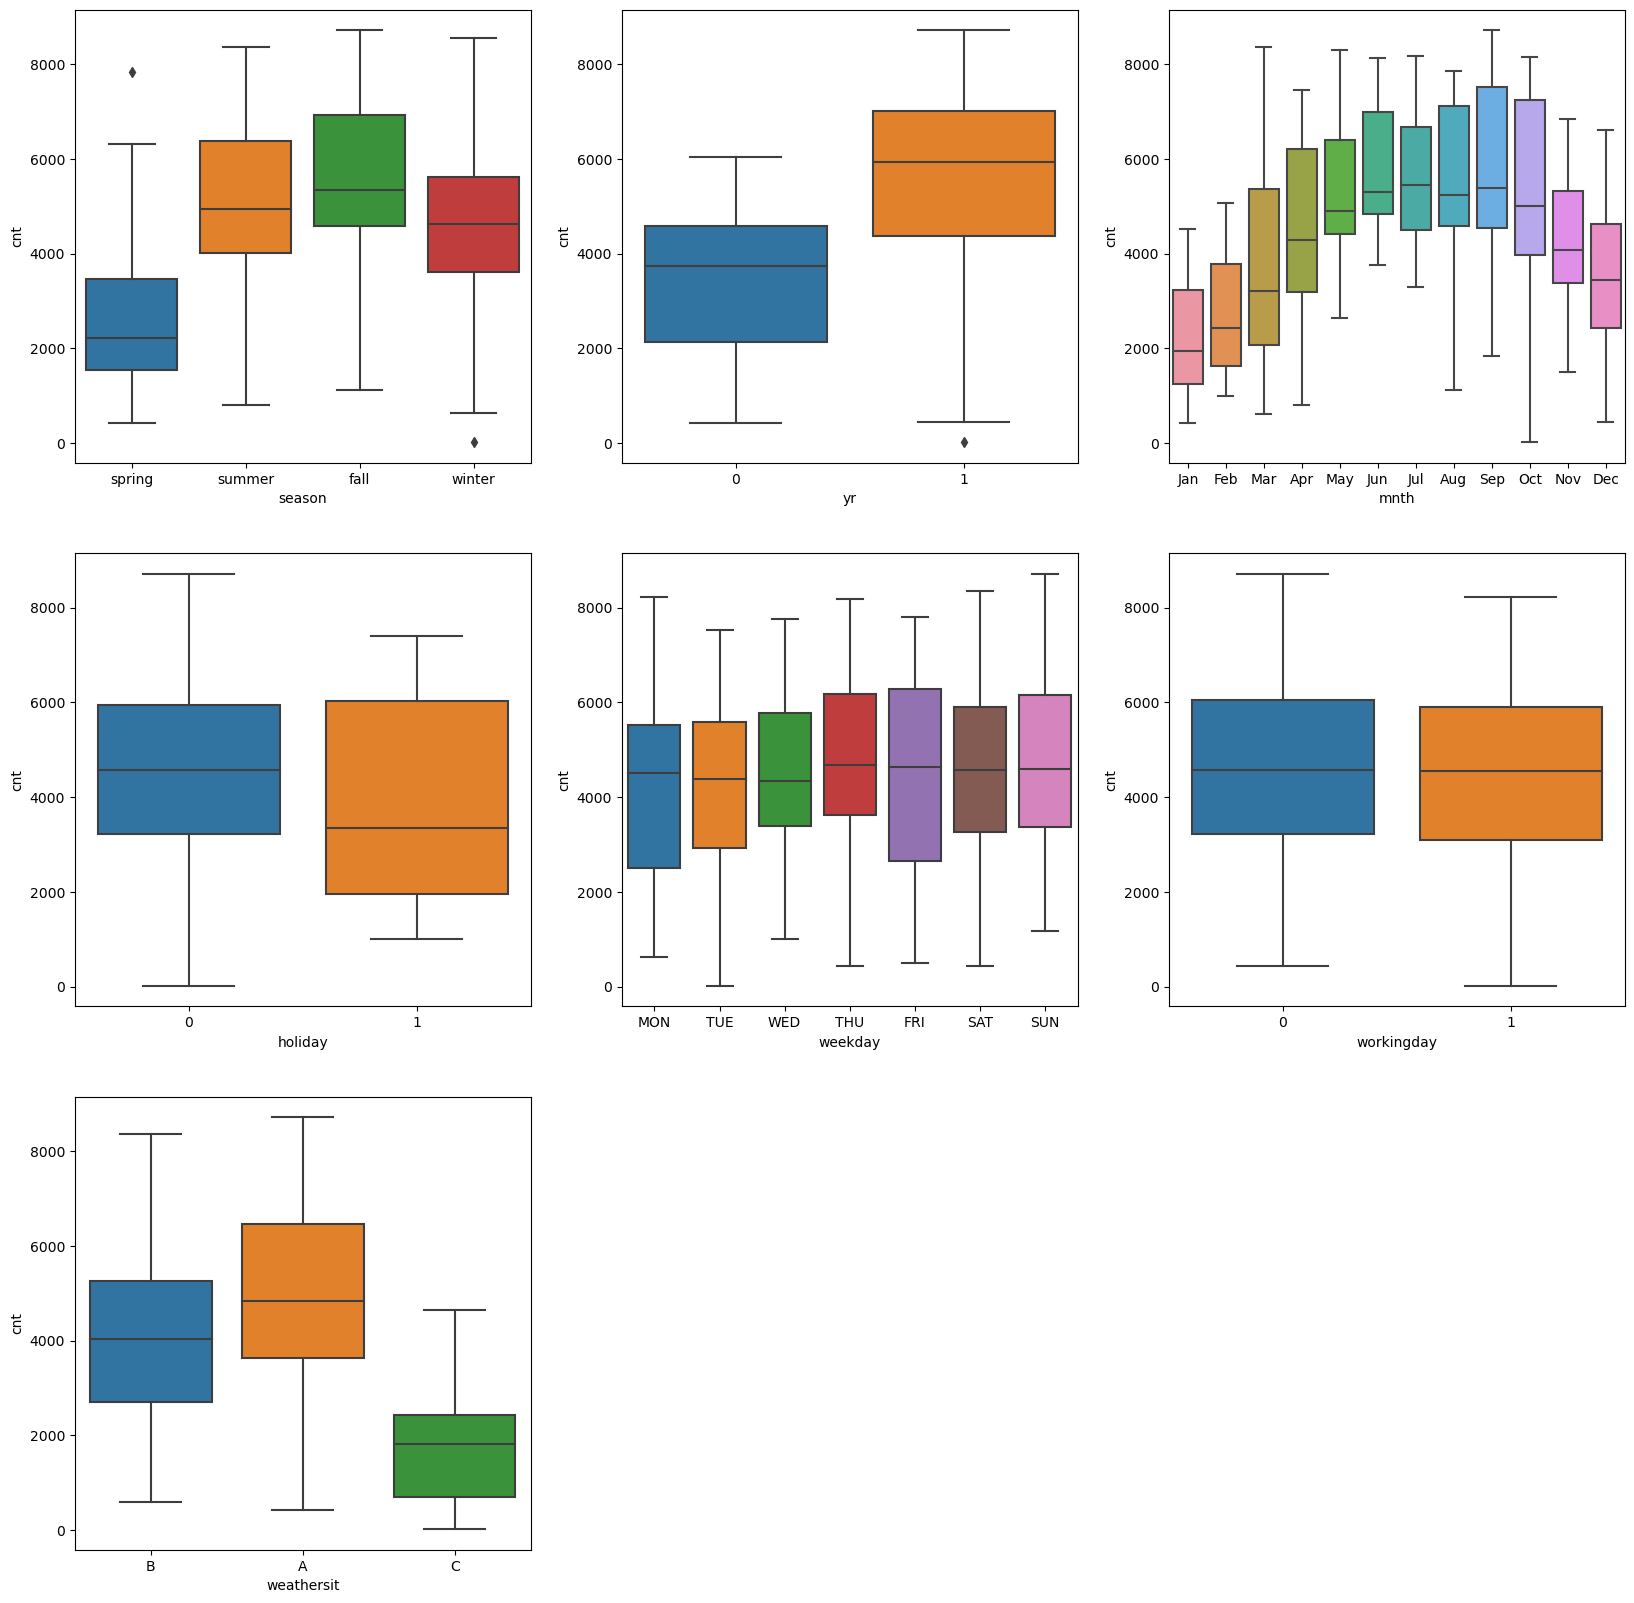

In [39]:
plt.figure(figsize=(20, 20))  
for index,value in enumerate(cat_cols): #using enumerate to use both index and value from num_cols in subplot
    plt.subplot(3,3,(index+1))
    sns.boxplot(x = value, y = 'cnt',data = b_data)
plt.show()

#### Insights from Visualization of Categorical Columns:
1. Season: The demand (cnt) is lowest in Spring and increases in summer and fall and then 
again decreases slightly in winter. Now, this can be due to the fact that during spring weather 
is unpredictable with rain and windy conditions. The same can be said for winter due to cold 
weather and snowfall as well as less daylight hours. Summer and Fall on the other hand have 
stable weather conditions and promotes tourism and fun activities which in turn increases 
bike sharing demand.
2. Year: Compared to 2018 the demand has increased significantly in 2019. This may be simply 
due to the rising popularity of BoomBikes.
3. Month: The demand of bike sharing is low in January and it increases till September and 
again decreases till December. This is due to the seasonal change effect as explained earlier.
4. Holiday: The maximum demand is lower on a holiday compared to days which are not 
holiday. This may be due to the fact that people tend to be indoors on holidays.
5. Weekday: The demand throughout the week seems to be somewhat same however the 
spread slightly decreases till Thursday and increases on a Friday and stays somewhat same 
till Sunday. The increase in the lower spread of boxplot during Friday may be due to dip of 
demand in certain time/places and increase of demand in other time/places. In other words, 
the demand is a bit unpredictable and varies largely.
6. Working day: The demand is almost same for both working day and non-working day. Please 
note the non-working day also includes holidays.
7. Weather conditions: The demand is very low during Light Snow, Light Rain, Thunderstorm
and high during a clear day. This is because people don’t like to ride on a bad weather.

## Data Preparation

Now in our data preparation we need to create dummy variables for our categorical columns 

In [40]:
# we will not include yr,holiday,workingday as they r already encoded in 0,1 format and have sense of True/False

cat_cols_dummy = ['season','mnth','weekday','weathersit']

In [41]:
dummy_frame = pd.get_dummies(b_data[cat_cols_dummy],drop_first = True)

In [42]:
dummy_frame.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# lets convert these to 0/1 instead of True/False
dummy_frame = dummy_frame.astype('int')

In [44]:
dummy_frame.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# now lets merge this dummy frame to our original data frame
# but before that let us drop our original columns 'season','mnth','weekday','weathersit' 
#since we already created dummy variables to represent these columns

In [46]:
# dropping the above columns
b_data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace =True)

In [47]:
b_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,1,9.305237,43.6957,12.522300,1600


In [48]:
#concat dummy data frame to original data frame


b_data = pd.concat([b_data,dummy_frame],axis=1)

In [49]:
b_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   season_spring  730 non-null    int32  
 8   season_summer  730 non-null    int32  
 9   season_winter  730 non-null    int32  
 10  mnth_Aug       730 non-null    int32  
 11  mnth_Dec       730 non-null    int32  
 12  mnth_Feb       730 non-null    int32  
 13  mnth_Jan       730 non-null    int32  
 14  mnth_Jul       730 non-null    int32  
 15  mnth_Jun       730 non-null    int32  
 16  mnth_Mar       730 non-null    int32  
 17  mnth_May       730 non-null    int32  
 18  mnth_Nov  

## Model Building

Now we are ready for our model building.
<br>
- First step is to split our data into train and test sets.

In [51]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(b_data, train_size =0.70 , test_size =0.30,random_state =100)


In [52]:
b_data.shape

(730, 29)

In [53]:
df_train.shape

(510, 29)

In [54]:
df_test.shape

(219, 29)

- Next we will rescale our numerical columns since we can see except cnt,registered and casual all other numeric column have very small values.
    - Scaling will bring them on a comparable scale
    - We will use MinMax Scaling

In [55]:
#import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
#apply sclaler.fit_transform to all numerical columns

num_cols

['temp', 'hum', 'windspeed', 'cnt']

In [57]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [58]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0


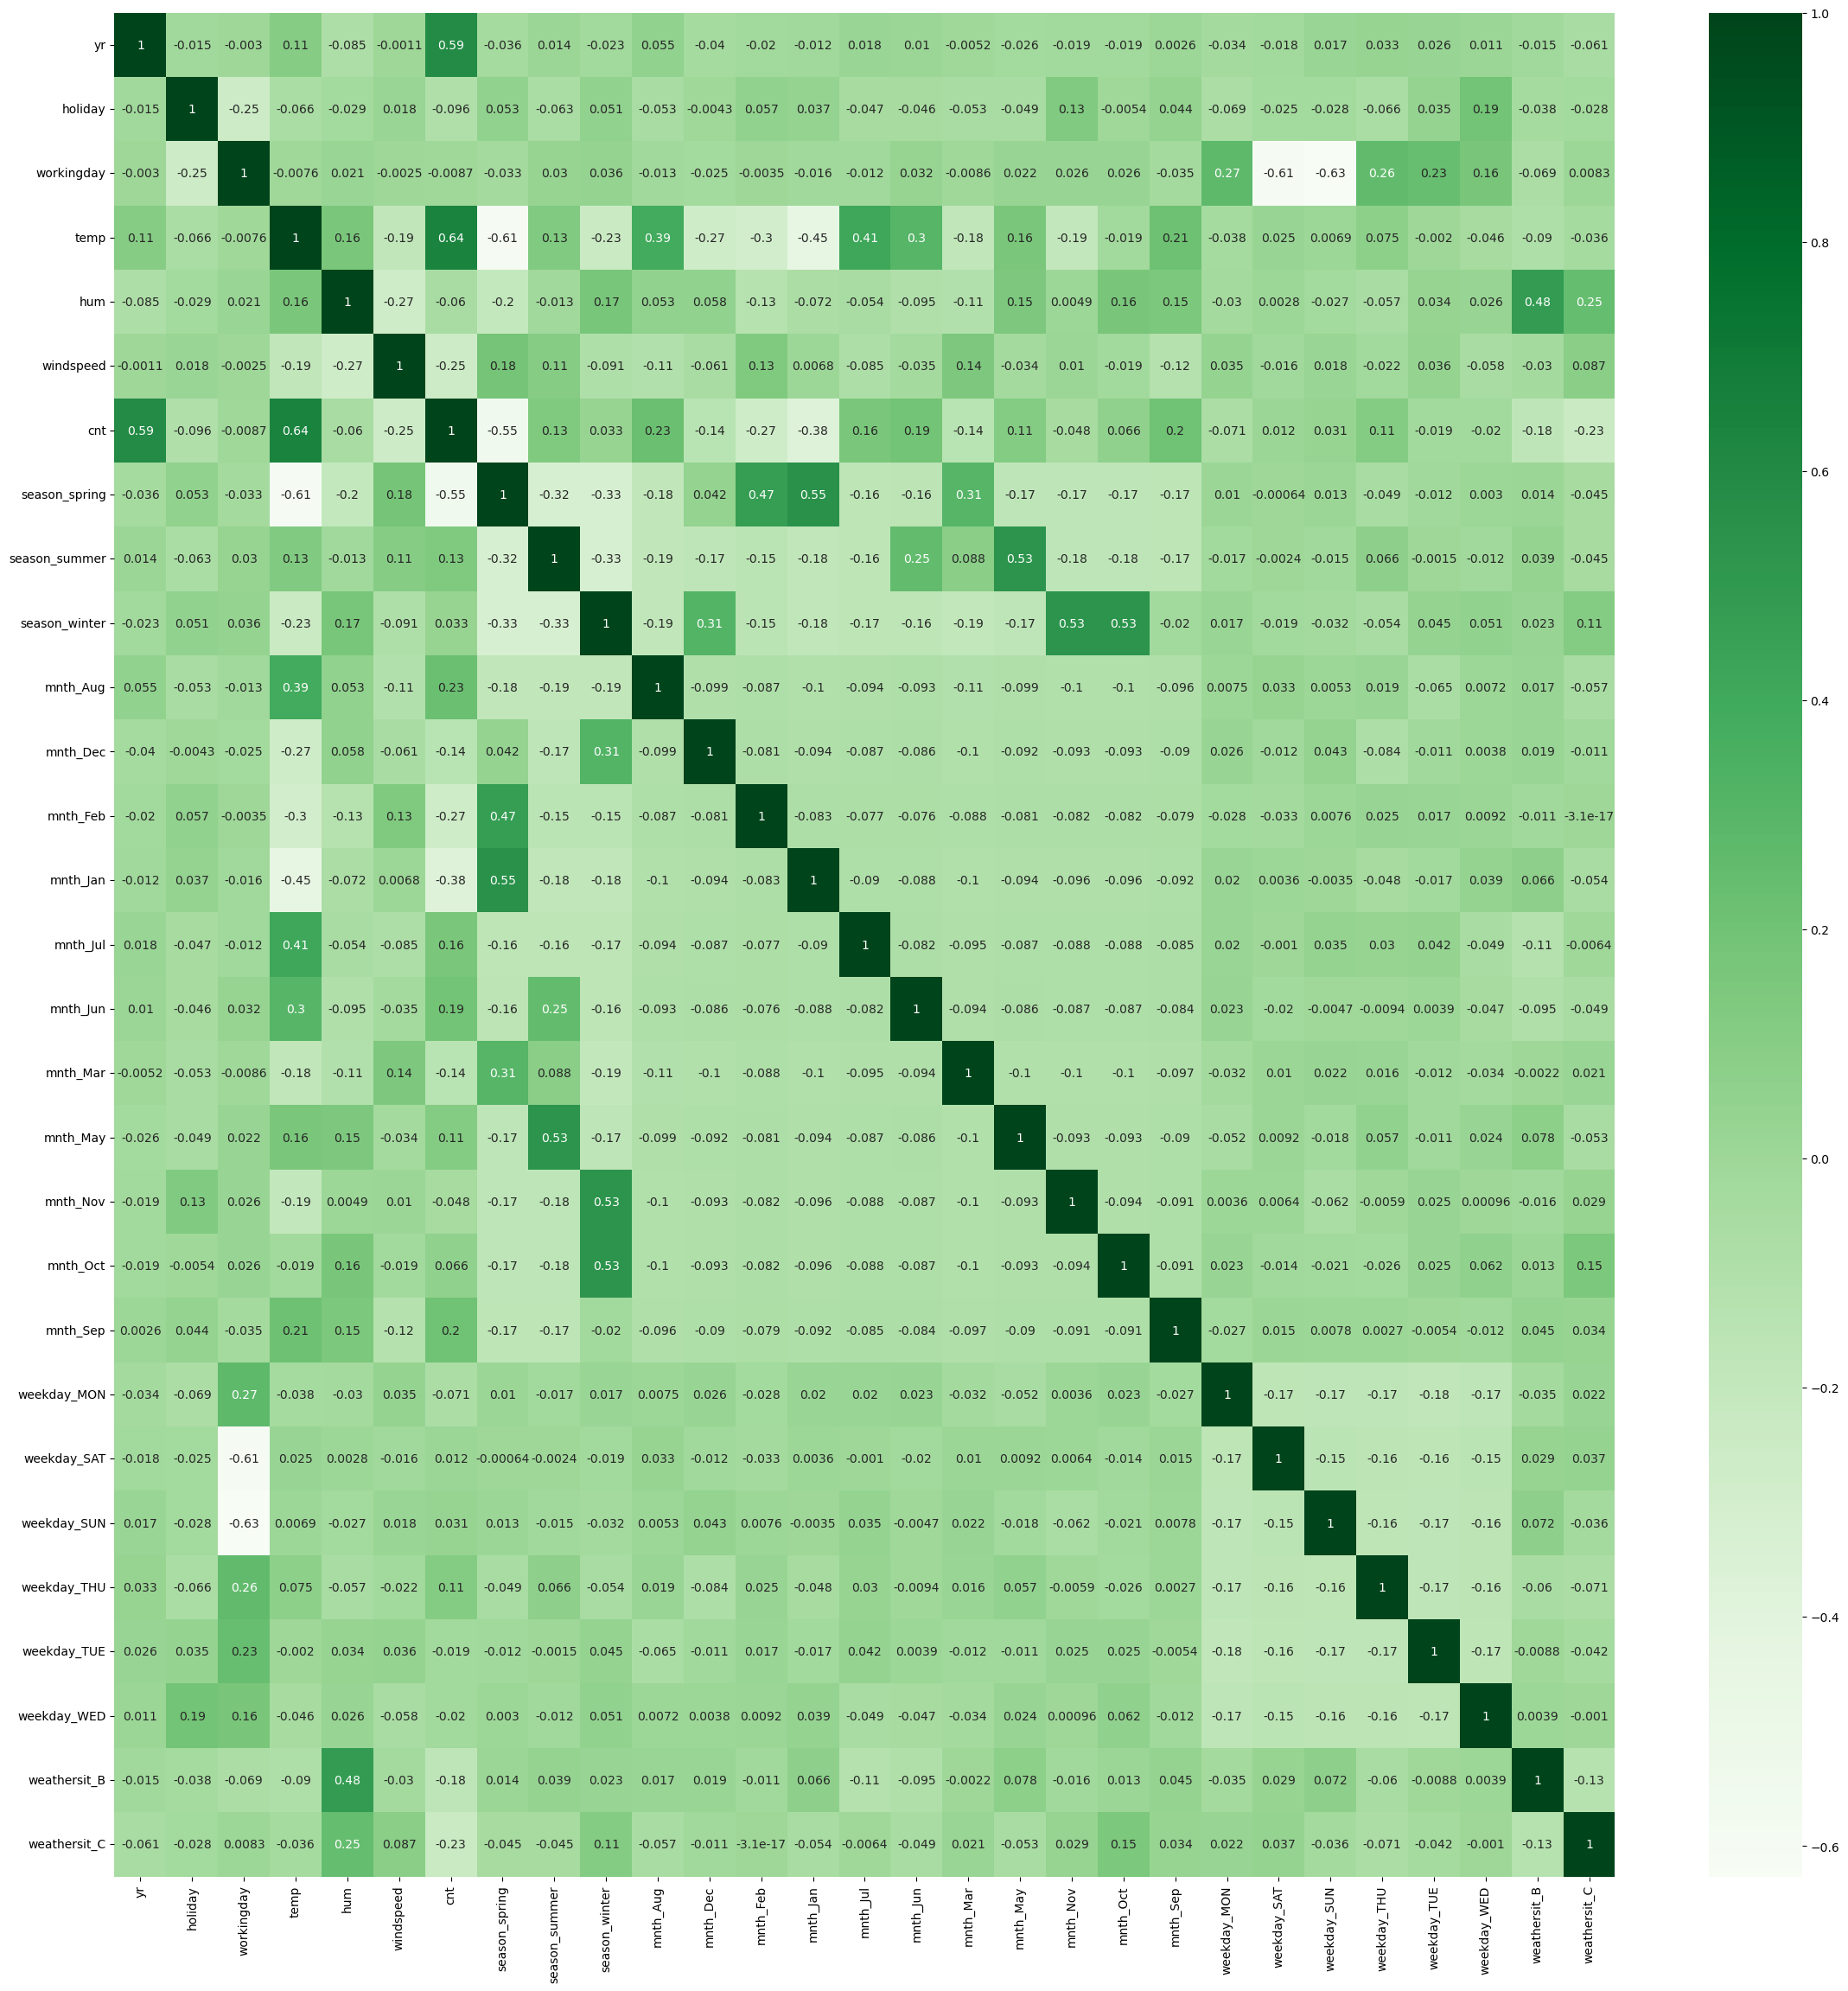

In [59]:
plt.figure(figsize=(28,28))
sns.heatmap(df_train.corr(),annot =True, cmap ='Greens')
plt.show()

In [60]:
# let us divide train set into X and y 
y_train = df_train.pop('cnt')
X_train = df_train

In [61]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [62]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


#### MODEL 0 : Building  with all features 

In [63]:
# using statsmodel

import statsmodels.api as sm

# add constant 
X_train_lm = sm.add_constant(X_train)

#fit 
lr = sm.OLS(y_train, X_train_lm).fit()

# check coeff
lr.params

const            0.394543
yr               0.230857
holiday         -0.135424
workingday      -0.060524
temp             0.445458
hum             -0.157315
windspeed       -0.183046
season_spring   -0.043705
season_summer    0.042243
season_winter    0.110897
mnth_Aug         0.021507
mnth_Dec        -0.045669
mnth_Feb        -0.037279
mnth_Jan        -0.063612
mnth_Jul        -0.034910
mnth_Jun         0.000975
mnth_Mar         0.000608
mnth_May         0.024064
mnth_Nov        -0.041555
mnth_Oct         0.005790
mnth_Sep         0.086055
weekday_MON     -0.024633
weekday_SAT     -0.056319
weekday_SUN     -0.049961
weekday_THU      0.003863
weekday_TUE     -0.026299
weekday_WED     -0.011241
weathersit_B    -0.059355
weathersit_C    -0.251511
dtype: float64

In [64]:
#check stats
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.33e-179
Time:                        15:33:44   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3945      0.085      4.640

In [65]:
# lets check the coeff using SKlearn as well
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [66]:
# create instance of linear regression
lm = LinearRegression()

# Fit 
lm.fit(X_train, y_train)


# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23085682 -0.13542389 -0.06052424  0.44545797 -0.15731473 -0.18304612
 -0.04370474  0.04224289  0.11089693  0.02150709 -0.04566922 -0.03727876
 -0.06361179 -0.03490968  0.00097451  0.00060798  0.02406416 -0.04155465
  0.00578994  0.08605503 -0.02463298 -0.05631912 -0.04996141  0.00386328
 -0.02629921 -0.01124081 -0.05935514 -0.25151085]
0.3945428483421006


With this model we got adj. R2 value as 84.2% which is good but there are some variables which are having high p value
<br> 
and are not that relevant in explaining the target variable.
<br>
Let us use **RFE**(Recursive Feature Elimination) to build models by reducing such features and check how it affects adjusted R2

#### MODEL 1 : Building with 14 features

In [67]:
# RFE
# let us start with 14 features 

from sklearn.feature_selection import RFE


lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm ,n_features_to_select=14)         
rfe = rfe.fit(X_train, y_train)

In [68]:
# columns with their rfe support and rankings

list(zip(X_train.columns,rfe.support_,rfe.ranking_))



[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_MON', False, 9),
 ('weekday_SAT', False, 5),
 ('weekday_SUN', False, 6),
 ('weekday_THU', False, 13),
 ('weekday_TUE', False, 8),
 ('weekday_WED', False, 11),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [69]:
#columns which got selected
# storing the selected columns in col
col = X_train.columns[rfe.support_]
col 

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [70]:
#columns which got rejected
X_train.columns[~rfe.support_]


Index(['workingday', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_MON', 'weekday_SAT',
       'weekday_SUN', 'weekday_THU', 'weekday_TUE', 'weekday_WED'],
      dtype='object')

In [71]:
# now let us build stats model using the RFE accepted columns

In [72]:
X_train_rfe1 = X_train[col]

#add constant
X_train_rfe1 = sm.add_constant(X_train_rfe1)

#fit
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
#print summary stats
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.25e-189
Time:                        15:33:50   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3030      0.035      8.597

Dropping 14 features resulted in a drop of adjusted R2 from 84.2% to 84.0% which is quite good.
<br>
However we need to check multicollinearity among the selected features and keep dropping features untill we get
<br> 
satisfactory VIF values of selected features

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
X=X.drop('const',axis=1) # neglect effect of const
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,season_spring,4.37
7,season_winter,3.78
6,season_summer,2.79
12,weathersit_B,2.29
0,yr,2.09
8,mnth_Jan,1.67
9,mnth_Jul,1.59


Now we can see VIF values of some features are quite high.
<br>
Let us now use RFE again to build model using 10 features. If we find adjusted R2 value decreases drastically, then we will increase the number of features from 10 else we will proceed to decrease further accordingly untill VIF and p values are in acceptable range.

#### MODEL 2 : Building with 10 features

In [74]:
lm = LinearRegression()
lm.fit(X_train_rfe1, y_train)

rfe2 = RFE(estimator=lm ,n_features_to_select=10)         
rfe2 = rfe2.fit(X_train_rfe1, y_train)

In [75]:
#storing features which got selected in col
col = X_train_rfe1.columns[rfe2.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_C'],
      dtype='object')

In [76]:
# now lets create stats model using the above RFE selected columns

X_train_rfe2 = X_train_rfe1[col]

#add constant

X_train_rfe2 = sm.add_constant(X_train_rfe2)

#fit

lm2  = sm.OLS(y_train,X_train_rfe2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.53e-184
Time:                        15:33:53   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3769      0.031     12.133

Dropping of 4 Features resulted in a adjusted R2 drop from 84% to 82.6%. Let us check Vif to see if we need to proceed further

In [77]:
# lets check VIF of these 10 features

vif = pd.DataFrame()
X = X_train_rfe2
X=X.drop('const',axis=1) # neglect effect of const
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_Jul,1.40
8,mnth_Sep,1.20
9,weathersit_C,1.11
1,holiday,1.04


In [78]:
# VIF of humidity is still high even after dropping additional 4 columns
#let us drop humidity column

X_train_rfe2  = X_train_rfe2.drop('hum',axis=1)

In [79]:
#let us now again build the model using statsmodel to check new adjusted R2 values and VIF of the 9 columns

#### MODEL 3 : Building with 9 features

In [80]:
#add constant
X_train_rfe3 = sm.add_constant(X_train_rfe2)

#fit
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
#check summary
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.33e-171
Time:                        15:33:56   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2042      0.025      8.095

In [81]:
# lets check VIF of these 9 features

vif = pd.DataFrame()
X = X_train_rfe3
X=X.drop('const',axis=1) # neglect effect of const
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_Jul,1.34
7,mnth_Sep,1.20
8,weathersit_C,1.06
1,holiday,1.04


Now we can see VIF values are all less than 5. However VIF of temp is still close to 5 but at the same time temp is a crucial feature and cannot be dropped. If we look at p values of the 9 selected features we can see mnth_Sep is higher than other features. This does not necessarily mean we should drop mnth_Sep but let us check how dropping of mnth_Sep affectes adjusted R2 and Vif of remaining features. If drop in adj.R2 is large we will keep 9 features as above.

In [82]:
# drop mnth_Sep
X_train_rfe3 = X_train_rfe3.drop('mnth_Sep',axis=1)

In [83]:
#let us now build using 8 features

#### MODEL 4 : Building with 8 features

In [84]:
#add constant
X_train_rfe4 = sm.add_constant(X_train_rfe3)
#fit
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
#print summary stats
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.14e-170
Time:                        15:33:58   Log-Likelihood:                 450.60
No. Observations:                 510   AIC:                            -883.2
Df Residuals:                     501   BIC:                            -845.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2038      0.025      8.022

As we can observe, adjusted R2 value dropped from 80.1% to 79.8% due to removal of 1 feature which is very good stats. Also we can see p values of all the 8 features are 0. Now let us check VIF values once again.


In [85]:
#Check Vif of 8 features

vif = pd.DataFrame()
X = X_train_rfe4
X=X.drop('const',axis=1) # neglect effect of const
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,3.96
3,windspeed,3.93
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_Jul,1.29
7,weathersit_C,1.06
1,holiday,1.04


As we can see, our VIF values also reduced and is now safely less than 5.
Now we can safely say that our model is explaining most of the variance. Let us proceed with this model. But before that let us summarize how adjusted R2 values changed by decreasing features from 28 to 8.
- **adjusted R2 value for Model 0 (28 features) : 84.2%** (initial model)
- adjusted R2 value for Model 1 (14 features)      : 84.0%
- adjusted R2 value for Model 2 (10 features)      : 82.6%
- adjusted R2 value for Model 3 (9 features)       : 80.1%
- **adjusted R2 value for Model 4 (8 features)  : 79.8%** (final model)

## Evaluation and Prediction

In [86]:
# X_train_rfe4 is our final X_train
# y_train is our final y_train
# lm4  is our final fitted model

Let us perform residual analysis

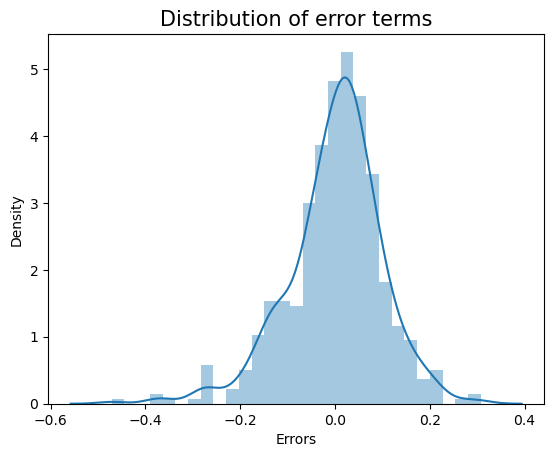

In [87]:
y_train_predicted  = lm4.predict(X_train_rfe4)
error = y_train-y_train_predicted

# lets plot a distribution of  error terms
plt.title('Distribution of error terms',fontsize=15)
sns.distplot(error)
plt.xlabel('Errors')
plt.show()

We can see that the error terms are approximately centered around 0 and are following a normal distribution.



.

.

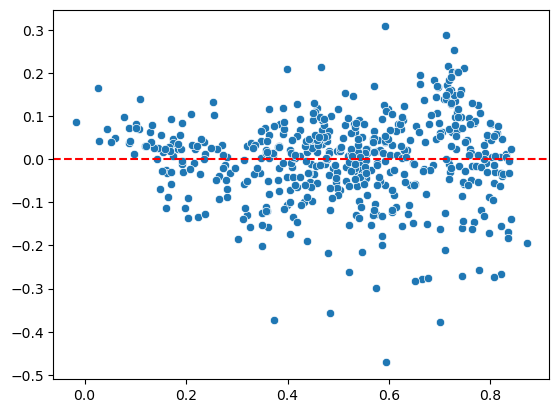

In [88]:
# let us plot a scatter plot to check Homoscedasticity 
sns.scatterplot(x= y_train_predicted, y = error)
#plot a horizontal line at 0 
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

We can observe from the obove scatter plot that residuals are randomly scattered around the horizontal line at zero without any specific pattern. So we can say  that the assumption of homoscedasticity is satisfied.

Before we make predictions on our test data , we need to scale our test set and also remove the columns which are not in our final model.

In [89]:
# scaling of test data
# columns which we scaled were in num_cols
df_test[num_cols] = scaler.transform(df_test[num_cols]) 


In [90]:
# assigning 'cnt' to y_test
y_test = df_test.pop('cnt') 
#assigning remaing test data to X_test
X_test =df_test

In [91]:
# now lets only select those 8 features which we used in our final model
col = X.columns

In [92]:
col

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Jul', 'weathersit_C'],
      dtype='object')

In [93]:
# lets call the final X_test as X_test_rfe4 
X_test_rfe4 = X_test[col] 

In [94]:
# Adding a constant variable 
X_test_rfe4 = sm.add_constant(X_test_rfe4)

In [95]:
# make predictions
y_test_pred = lm4.predict(X_test_rfe4)


In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.787846218596671

**So using our final model, our test set R2 score is 78.8% and our training set R2 score is about 80.1%.
And our training set adjusted R2 score is about 79.8%.
<br>
So overall, we have a decent model.**


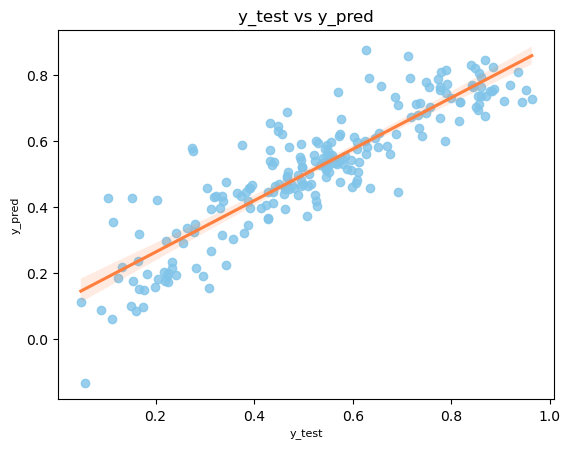

In [97]:
# Let us Visualize the fit on the test data by plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, scatter_kws={"color": "#80C4E9"},line_kws={"color": "#FF7F3E"})
plt.title('y_test vs y_pred', fontsize=12)
plt.xlabel('y_test', fontsize=8)
plt.ylabel('y_pred', fontsize=8)
plt.show()

In [98]:
# our final coefficients are as below
round(lm4.params,2)

const            0.20
yr               0.23
holiday         -0.08
temp             0.49
windspeed       -0.14
season_spring   -0.10
season_winter    0.05
mnth_Jul        -0.07
weathersit_C    -0.25
dtype: float64

In [99]:
# let us write our final equation for the  demand of shared bikes

**cnt = 0.20 + (0.23 x yr)  + (-0.08 x holiday) + (0.49 x temp) + (-0.14 x windspeed) + (-0.10 x season_spring) + (0.05 x season_winter) + (-0.07 x mnth_Jul) + (-0.25 x weathersit_C)** 

Therefore, Following are the significant variables to predict the demand for shared bikes

- year(2019)
- holiday
- temperature
- windspeed
- season_spring
- season_winter 
- month_July
- weathersit(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

